In [2]:
from google.colab import drive
drive.mount('/content/drive')
!ln -s "/content/drive/My Drive" /content/gdrive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
ln: failed to create symbolic link '/content/gdrive/My Drive': Input/output error


In [3]:
cd gdrive/香川

/content/drive/My Drive/香川


## 必要なライブラリのダウンロード

In [4]:
import numpy as np                                                             #数値計算のライブラリ
import pandas as pd                                                            #データ分析のライブラリ
import matplotlib.pyplot as plt                                              #グラフ描画のライブラリ
import seaborn as sns                                                          #データを可視化するライブラリ
import sklearn                                                                      #機械学習のライブラリ
from sklearn.datasets import load_iris                                   #irisデータを読み込む
from tensorflow.keras.utils import to_categorical                   #one-hotベクトル化を行う
from sklearn import preprocessing                                        #標準化処理
from sklearn.model_selection import train_test_split               #トレーニングデータとテストデータに分割する
from tensorflow.keras.models import Model                           #モデルの宣言
from tensorflow.keras.layers import Dense                             #全結合層
from tensorflow.keras.models import model_from_json           #モデルの保存と読み込み
from tensorflow.keras.utils import plot_model                         #モデルの可視化
from tensorflow.keras.layers import concatenate,add              # モデルの結合用
from tensorflow.keras.callbacks import EarlyStopping             # 学習の早期終了
from tensorflow.keras.layers import Dropout                           # ドロップアウト
from tensorflow.keras.layers import Input                                # モデルの入力用
from tensorflow.keras.callbacks import ModelCheckpoint         # 裁量のモデルの保存用
from tensorflow.python.keras.models import load_model          # モデルの保存用
sns.set()                                                                                 # matplotlibのplotをseabornのスタイルにする

## irisデータの収集

In [5]:
iris = load_iris()

In [6]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [8]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [9]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


## irisデータの前処理

In [10]:
iris = load_iris()
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [11]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
df["label"] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


#### データの可視化

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


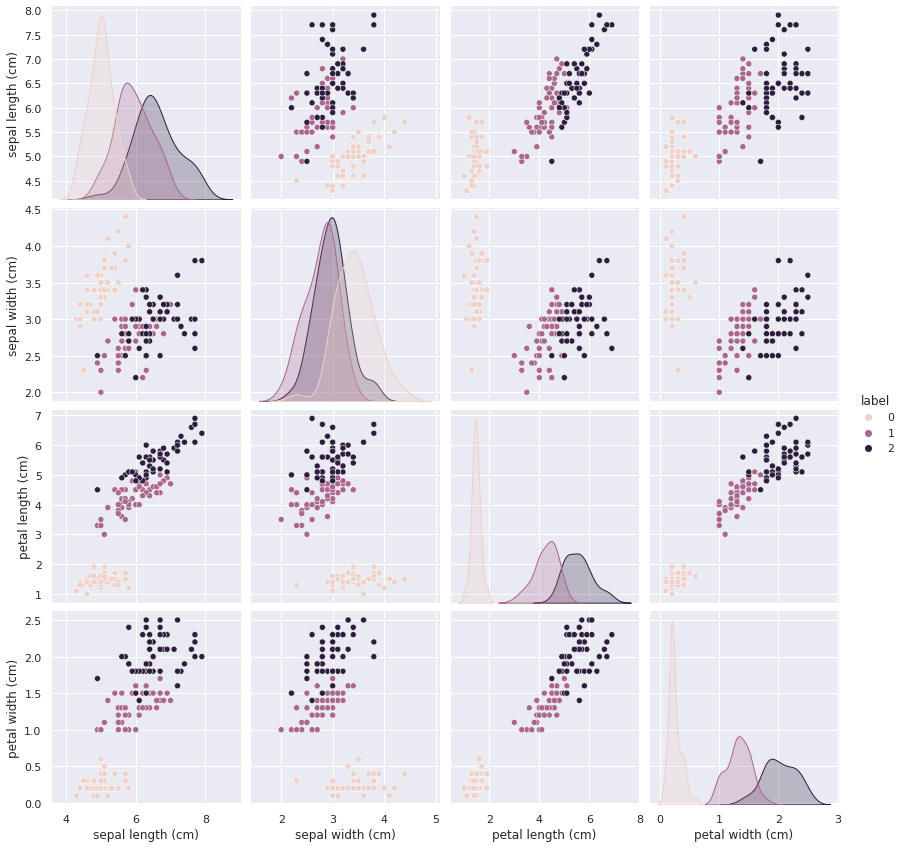

In [13]:
#データの可視化
sns.pairplot(df, hue="label", size=3)

#### データの相関係数



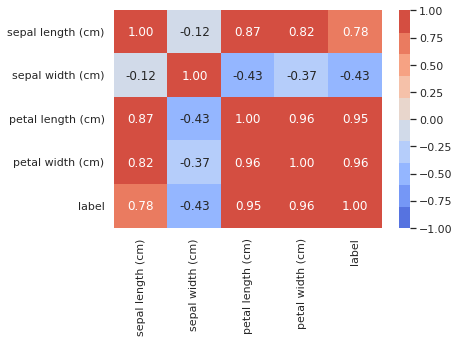

In [14]:
cor = df[['sepal length (cm)',
              'sepal width (cm)',
              'petal length (cm)',
              'petal width (cm)',
              'label']].corr()
sns.heatmap(cor, cmap= sns.color_palette('coolwarm', 10), annot=True,fmt='.2f', vmin = -1, vmax = 1)

In [15]:
df.iloc[:,0:-1].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
# df.iloc[行, 列]
df[(df["petal length (cm)"]<=2.0) & (df["label"]==0)]
df["label"] == 2

0      False
1      False
2      False
3      False
4      False
       ...  
145     True
146     True
147     True
148     True
149     True
Name: label, Length: 150, dtype: bool

In [17]:
df.iloc[:,-1]

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: label, Length: 150, dtype: int64

# 前処理

In [18]:
data_X = preprocessing.scale(df.iloc[:,0:-1])#標準化
data_y = to_categorical(df.iloc[:,-1])#one-hotベクトル化

In [19]:
data_X

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [20]:
data_y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

# トレーニングデータとテストデータの分割

In [21]:
#トレーニングデータとテストデータに分類 8:2


X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, 
                                                                        test_size=0.2,
                                                                        random_state = 2,
                                                                       shuffle = True)

In [22]:
X_train.shape

(120, 4)

In [23]:
X_test.shape

(30, 4)

In [24]:
y_train.shape

(120, 3)

In [25]:
y_test.shape

(30, 3)

## モデルの構築

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


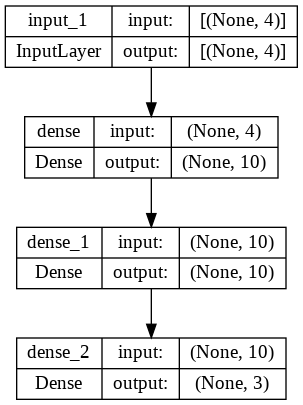

In [26]:
#簡単な3層のモデルの実装



i =  Input(shape=(X_train.shape[1]))
x = Dense(10, activation="relu" )(i)
x =  Dense(10, activation="relu" )(x)
x = Dense(y_train.shape[1], activation="softmax")(x)
model1 = Model(i,x)
model1.compile( loss="categorical_crossentropy",
                       optimizer="adam", metrics=['accuracy'])



model1.summary()
plot_model(
    model1,
    show_shapes=True,
)


In [27]:
history1 = model1.fit(X_train,y_train,
                   epochs=20,
                    validation_split=0.2,
                    verbose=2
                   )

Epoch 1/20
3/3 - 1s - loss: 1.2505 - accuracy: 0.2708 - val_loss: 1.0707 - val_accuracy: 0.4167 - 737ms/epoch - 246ms/step
Epoch 2/20
3/3 - 0s - loss: 1.2268 - accuracy: 0.2708 - val_loss: 1.0522 - val_accuracy: 0.4167 - 28ms/epoch - 9ms/step
Epoch 3/20
3/3 - 0s - loss: 1.2051 - accuracy: 0.2708 - val_loss: 1.0342 - val_accuracy: 0.4167 - 40ms/epoch - 13ms/step
Epoch 4/20
3/3 - 0s - loss: 1.1838 - accuracy: 0.2708 - val_loss: 1.0163 - val_accuracy: 0.4167 - 32ms/epoch - 11ms/step
Epoch 5/20
3/3 - 0s - loss: 1.1626 - accuracy: 0.2812 - val_loss: 0.9988 - val_accuracy: 0.4167 - 34ms/epoch - 11ms/step
Epoch 6/20
3/3 - 0s - loss: 1.1425 - accuracy: 0.2812 - val_loss: 0.9818 - val_accuracy: 0.4167 - 30ms/epoch - 10ms/step
Epoch 7/20
3/3 - 0s - loss: 1.1224 - accuracy: 0.2812 - val_loss: 0.9656 - val_accuracy: 0.4167 - 32ms/epoch - 11ms/step
Epoch 8/20
3/3 - 0s - loss: 1.1042 - accuracy: 0.2812 - val_loss: 0.9495 - val_accuracy: 0.4167 - 33ms/epoch - 11ms/step
Epoch 9/20
3/3 - 0s - loss: 1.0

In [28]:
history1.history

{'loss': [1.2504823207855225,
  1.2268339395523071,
  1.205053448677063,
  1.1838220357894897,
  1.1626102924346924,
  1.1425132751464844,
  1.1224204301834106,
  1.1041911840438843,
  1.0866905450820923,
  1.069049596786499,
  1.0523606538772583,
  1.0360736846923828,
  1.0206687450408936,
  1.005259394645691,
  0.9894354939460754,
  0.9751456379890442,
  0.9591576457023621,
  0.944373607635498,
  0.9302926063537598,
  0.9153673052787781],
 'accuracy': [0.2708333432674408,
  0.2708333432674408,
  0.2708333432674408,
  0.2708333432674408,
  0.28125,
  0.28125,
  0.28125,
  0.28125,
  0.2916666567325592,
  0.3125,
  0.3125,
  0.3229166567325592,
  0.34375,
  0.375,
  0.3958333432674408,
  0.4166666567325592,
  0.4479166567325592,
  0.4895833432674408,
  0.5104166865348816,
  0.53125],
 'val_loss': [1.070658802986145,
  1.0522371530532837,
  1.0342024564743042,
  1.01628577709198,
  0.9988155961036682,
  0.9817730784416199,
  0.9656473994255066,
  0.9495372772216797,
  0.9338986277580261

In [29]:
accuracy = history1.history["accuracy"]
loss = history1.history["loss"]
epochs = range(1, len(loss) + 1)

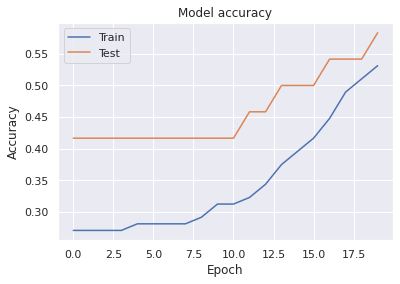

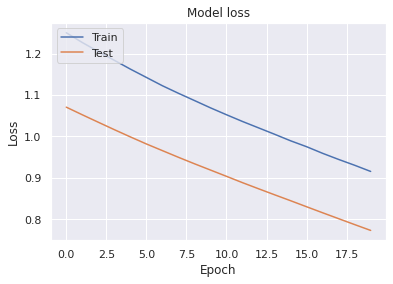

In [30]:
# Plot training & validation accuracy values
plt.plot(history1.history["accuracy"])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [31]:
loss, accuracy = model1.evaluate(X_test, y_test, verbose=0)
print("loss:"+str(loss))
print("accuracy:"+str(accuracy))

loss:0.8177621364593506
accuracy:0.6666666865348816


## モデルの再構築

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_3 (Dense)             (None, 100)               500       
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 3)                 303       
                                                                 
Total params: 10,903
Trainable params: 10,903
Non-trainable params: 0
_________________________________________________________________


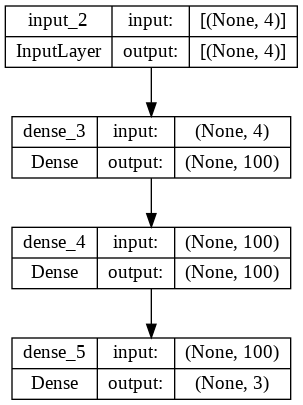

In [32]:
i =  Input(shape=(X_train.shape[1]))
x = Dense(100, activation="relu" )(i)
x =  Dense(100, activation="relu" )(x)
x = Dense(y_train.shape[1], activation="softmax")(x)
model2 = Model(i,x)
model2.compile( loss="categorical_crossentropy",
                       optimizer="adam", metrics=['accuracy'])
model2.summary()
plot_model(
    model2,
    show_shapes=True,
)

## 再構築モデルの評価

### トレーニングデータの精度

In [33]:
history2 = model2.fit(X_train,y_train,
                                epochs=100,
                                validation_split = 0.2,
                                verbose=2)

Epoch 1/100
3/3 - 1s - loss: 1.0043 - accuracy: 0.6458 - val_loss: 0.8864 - val_accuracy: 0.7500 - 934ms/epoch - 311ms/step
Epoch 2/100
3/3 - 0s - loss: 0.8960 - accuracy: 0.7396 - val_loss: 0.7804 - val_accuracy: 0.7917 - 51ms/epoch - 17ms/step
Epoch 3/100
3/3 - 0s - loss: 0.7987 - accuracy: 0.8021 - val_loss: 0.6890 - val_accuracy: 0.7917 - 62ms/epoch - 21ms/step
Epoch 4/100
3/3 - 0s - loss: 0.7152 - accuracy: 0.8021 - val_loss: 0.6082 - val_accuracy: 0.7917 - 52ms/epoch - 17ms/step
Epoch 5/100
3/3 - 0s - loss: 0.6438 - accuracy: 0.8229 - val_loss: 0.5396 - val_accuracy: 0.7917 - 43ms/epoch - 14ms/step
Epoch 6/100
3/3 - 0s - loss: 0.5784 - accuracy: 0.8229 - val_loss: 0.4823 - val_accuracy: 0.7917 - 52ms/epoch - 17ms/step
Epoch 7/100
3/3 - 0s - loss: 0.5240 - accuracy: 0.8333 - val_loss: 0.4348 - val_accuracy: 0.7917 - 54ms/epoch - 18ms/step
Epoch 8/100
3/3 - 0s - loss: 0.4784 - accuracy: 0.8333 - val_loss: 0.3955 - val_accuracy: 0.8333 - 39ms/epoch - 13ms/step
Epoch 9/100
3/3 - 0s -

In [34]:
accuracy = history2.history["accuracy"]
loss = history2.history["loss"]
epochs = range(1, len(loss) + 1)

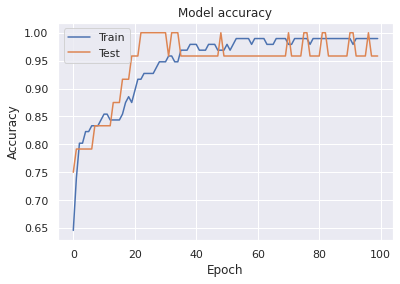

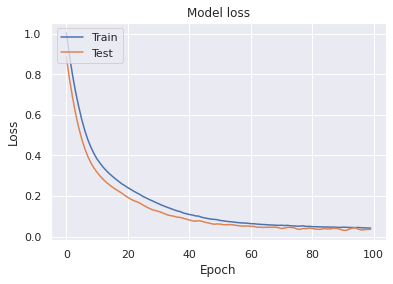

In [35]:
# Plot training & validation accuracy values
plt.plot(history2.history["accuracy"])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### テストデータで検証

In [36]:
loss, accuracy = model2.evaluate(X_test, y_test, verbose=0)
print("loss:",loss)
print("accuracy:",accuracy)

loss: 0.1408751755952835
accuracy: 0.9333333373069763


## モデルの保存と読み込み

In [37]:
# モデルの保存
model2.save("model.h5")

In [38]:
# モデルの読み込み
model_load = load_model("model.h5")
model_load.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               500       
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 303       
Total params: 10,903
Trainable params: 10,903
Non-trainable params: 0
_________________________________________________________________


In [41]:
loss,accuracy = model_load.evaluate(X_test, y_test,verbose=0)
print("loss:",loss)
print("accuracy:",accuracy)

loss: 0.1408751755952835
accuracy: 0.9333333373069763


## 演習問題

In [42]:
from sklearn.datasets import load_wine
wine = load_wine()

In [43]:
df2 = pd.DataFrame(wine.data, columns=wine.feature_names)

In [44]:
df2["label"]=wine.target

In [45]:
df2

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [ ]:
sns.pairplot(df2, hue="label",size=3)

In [ ]:
col = df2.columns

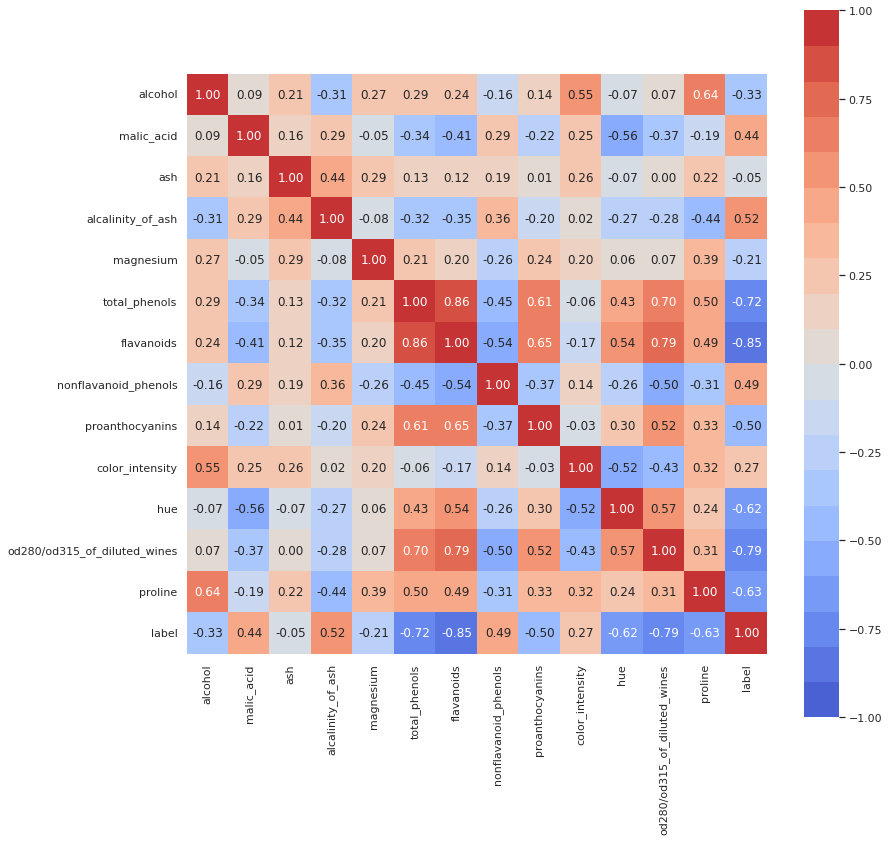

In [ ]:
cor = df2[col].corr()
plt.subplots(figsize=(13,13))
sns.heatmap(cor, cmap= sns.color_palette('coolwarm', 20), annot=True,fmt='.2f', vmin = -1, vmax = 1, square=True)

In [ ]:
df2.iloc[:,0:-1].describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
# データ型の確認
df2.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
label                             int64
dtype: object

In [ ]:
# 欠損値の確認
df2.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
label                           0
dtype: int64

In [ ]:
data_X2 = preprocessing.scale(df2.iloc[:,0:-1])#標準化
data_y2 = to_categorical(df2.iloc[:,-1])#one-hot　ベクトル化

data_X2.astype("float32")
data_y2.astype("int16")

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1,

In [ ]:
#トレーニングデータとテストデータに分類


X_train, X_test, y_train, y_test = train_test_split(data_X2, data_y2, 
                                                                      test_size=0.2, 
                                                                      random_state=1008)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense_6 (Dense)             (None, 32)                448       
                                                                 
 dense_7 (Dense)             (None, 32)                1056      
                                                                 
 dense_8 (Dense)             (None, 3)                 99        
                                                                 
Total params: 1,603
Trainable params: 1,603
Non-trainable params: 0
_________________________________________________________________


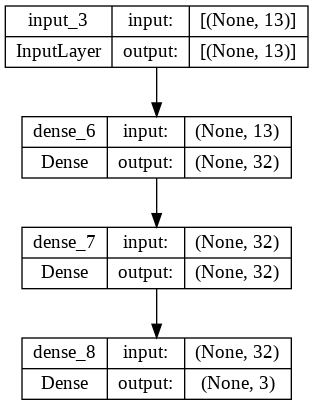

In [ ]:
#簡単な3層のモデルの実装

i =  Input(shape=(X_train.shape[1]))
x = Dense(32, activation="relu" )(i)
x =  Dense(32, activation="relu" )(x)
x = Dense(y_train.shape[1], activation="softmax")(x)
model = Model(i,x)
model.compile( loss="categorical_crossentropy",
                       optimizer="adam", metrics=['accuracy'])
model.summary()
plot_model(
    model,
    show_shapes=True,
)


In [ ]:
checkpoint = ModelCheckpoint(filepath = 'model_wine.h5',
                                  monitor='val_loss',
                                  verbose=1,
                                  save_best_only=True,
                                  save_weights_only=False,
                                  mode='min',
                                  period=1)

In [ ]:
history3 = model.fit(X_train,y_train,
                                epochs=200,
                                validation_split = 0.1,
                                verbose=2,
                                 callbacks = [checkpoint] )

In [ ]:
accuracy = history3.history["accuracy"]
loss = history3.history["loss"]
epochs = range(1, len(loss) + 1)

In [ ]:
# Plot training & validation accuracy values
plt.plot(history3.history["accuracy"])
plt.plot(history3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 40回程度で過学習

In [ ]:
loss,accuracy = model.evaluate(X_train, y_train,verbose=0)
print("loss:",loss)
print("accuracy:",accuracy)

In [ ]:
best_model = load_model("model_wine.h5")
loss,accuracy = best_model.evaluate(X_train, y_train,verbose=0)
print("loss:",loss)
print("accuracy:",accuracy)